In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
from plotter import *
import glob, os
import seaborn as sb

In [2]:
def get_objective(conn):
    """
    Retrieves the objective function
    """
    cursor = conn.cursor()
    command = "SELECT * FROM Output_Objective"
    cursor.execute(command)
    obj_value = cursor.fetchall()[0][-1]
    
    return obj_value

In [3]:
path = 'simulations/illinois/zero_adv_nuclear_RE_sensitivity/data_files/*V2.sqlite'
data_files = glob.glob(path, recursive=True)
data_files.sort()
data_files.append('simulations/illinois/zero_adv_nuclear/IL_ZAN_CC30_52.sqlite')
data_files

['simulations/illinois/zero_adv_nuclear_RE_sensitivity/data_files/IL_ZAN_S2010_W2010_52_V2.sqlite',
 'simulations/illinois/zero_adv_nuclear_RE_sensitivity/data_files/IL_ZAN_S2010_W2011_52_V2.sqlite',
 'simulations/illinois/zero_adv_nuclear_RE_sensitivity/data_files/IL_ZAN_S2010_W2012_52_V2.sqlite',
 'simulations/illinois/zero_adv_nuclear_RE_sensitivity/data_files/IL_ZAN_S2010_W2013_52_V2.sqlite',
 'simulations/illinois/zero_adv_nuclear_RE_sensitivity/data_files/IL_ZAN_S2010_W2014_52_V2.sqlite',
 'simulations/illinois/zero_adv_nuclear_RE_sensitivity/data_files/IL_ZAN_S2010_W2015_52_V2.sqlite',
 'simulations/illinois/zero_adv_nuclear_RE_sensitivity/data_files/IL_ZAN_S2010_W2016_52_V2.sqlite',
 'simulations/illinois/zero_adv_nuclear_RE_sensitivity/data_files/IL_ZAN_S2010_W2017_52_V2.sqlite',
 'simulations/illinois/zero_adv_nuclear_RE_sensitivity/data_files/IL_ZAN_S2010_W2018_52_V2.sqlite',
 'simulations/illinois/zero_adv_nuclear_RE_sensitivity/data_files/IL_ZAN_S2010_W2019_52_V2.sqlite',


In [4]:
region = 'IL'
comm = 'ELC'
frames = []
for file in data_files:
    conn = sqlite3.connect(file)
    df = get_annual_capacity(conn, region, comm)
    final_year = df[df.index==2050]
    final_year['Objective_Value'] = get_objective(conn)
    frames.append(final_year)
df = pd.concat(frames)

<ipython-input-4-310931bd8ef3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_year['Objective_Value'] = get_objective(conn)


In [5]:
df.fillna(0, inplace=True)
df

,BIOMASS,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM,Objective_Value
year,,,,,,,,
2050,2714.6166,2255.6,39813.245,688.8,12420.0,57065.811,24837.749,156221.644880
2050,3826.8516,2255.6,35331.663,688.8,12420.0,47783.583,27266.479,152978.632485
2050,7487.5953,2255.6,31328.838,688.8,12420.0,29676.528,32188.907,157709.649167
2050,4647.7844,2255.6,38284.279,688.8,12420.0,53467.055,21609.145,154773.396983
2050,7527.5134,2255.6,33726.666,688.8,12420.0,44425.275,25016.957,159020.901025
...,...,...,...,...,...,...,...,...
2050,7781.1775,2255.6,37213.188,688.8,12420.0,50205.788,23099.057,162098.078715
2050,6505.6030,2255.6,38329.614,688.8,12420.0,52599.377,21974.288,161387.731508
2050,4642.4560,2255.6,34715.012,688.8,12420.0,48978.861,27954.833,156198.017837


In [6]:
df.describe()

,BIOMASS,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM,Objective_Value
count,122.000000,1.220000e+02,122.000000,1.220000e+02,122.0,122.000000,122.000000,122.000000
mean,5672.229480,2.255600e+03,35852.639984,6.888000e+02,12420.0,51212.923197,24331.435451,158273.341558
std,1646.783601,3.196358e-12,2131.345721,1.598179e-12,0.0,8321.492077,3242.230086,3656.411023
min,1601.775400,2.255600e+03,30746.339000,6.888000e+02,12420.0,29676.528000,15749.237000,141064.840561
25%,4382.264075,2.255600e+03,34536.191500,6.888000e+02,12420.0,44589.976250,21965.159000,156210.443538
50%,5793.382050,2.255600e+03,35865.814500,6.888000e+02,12420.0,50971.034000,24382.945500,157877.671294
75%,7016.899200,2.255600e+03,37430.253500,6.888000e+02,12420.0,57025.559750,26795.811750,160552.113690
max,9760.153300,2.255600e+03,39871.808000,6.888000e+02,12420.0,70417.900000,32188.907000,167353.696067


In [7]:
techs = list(df.columns[:-1])

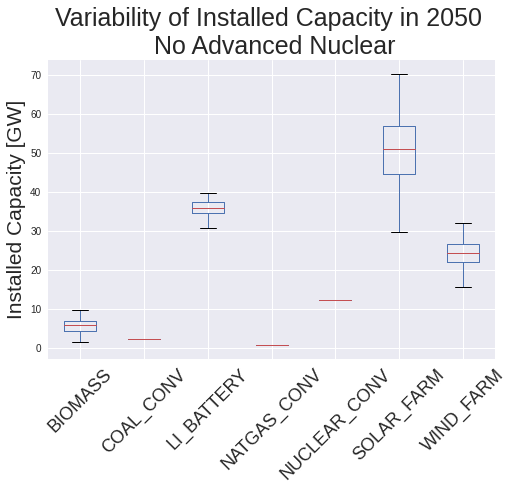

In [8]:
plt.style.use('seaborn')
plt.figure.figsize = (12,9)
(df[techs]/1000).boxplot()

plt.title('Variability of Installed Capacity in 2050 \n No Advanced Nuclear', fontsize=25)
plt.ylabel('Installed Capacity [GW]', fontsize=21)
plt.xticks(fontsize=18, rotation=45)
plt.show()

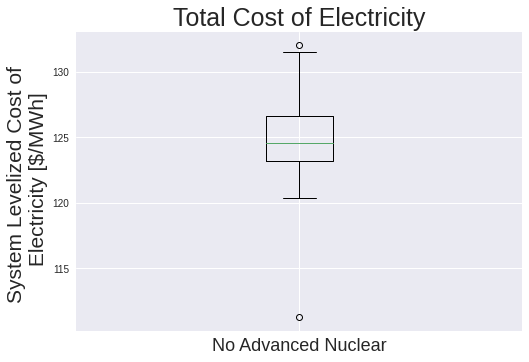

In [9]:
demand = 1267698.8
plt.style.use('seaborn')
plt.figure.figsize = (12,9)
plt.boxplot(df['Objective_Value']/demand*1000)

plt.title('Total Cost of Electricity', fontsize=25)
plt.ylabel('System Levelized Cost of \n Electricity [$/MWh]', fontsize=21)
plt.xticks([1],['No Advanced Nuclear'],fontsize=18)
plt.show()

In [10]:
df = df.reset_index().drop(columns='year')

In [11]:
(df['Objective_Value']).to_csv('data/objective_value_ZAN_V2.csv')

<AxesSubplot:>

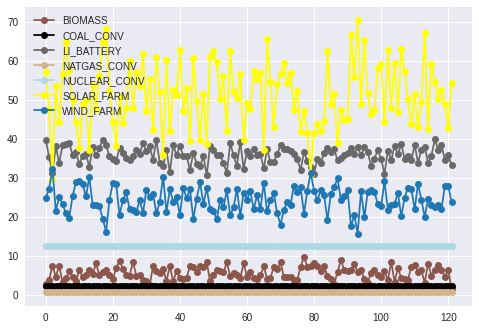

In [12]:
(df[techs]/1000).plot(marker='o', color=elc_colors)

The plot above suggests that biomass is useful when there is slightly less penetration of VREs. Biomass serves as baseload power and is relatively inflexible.

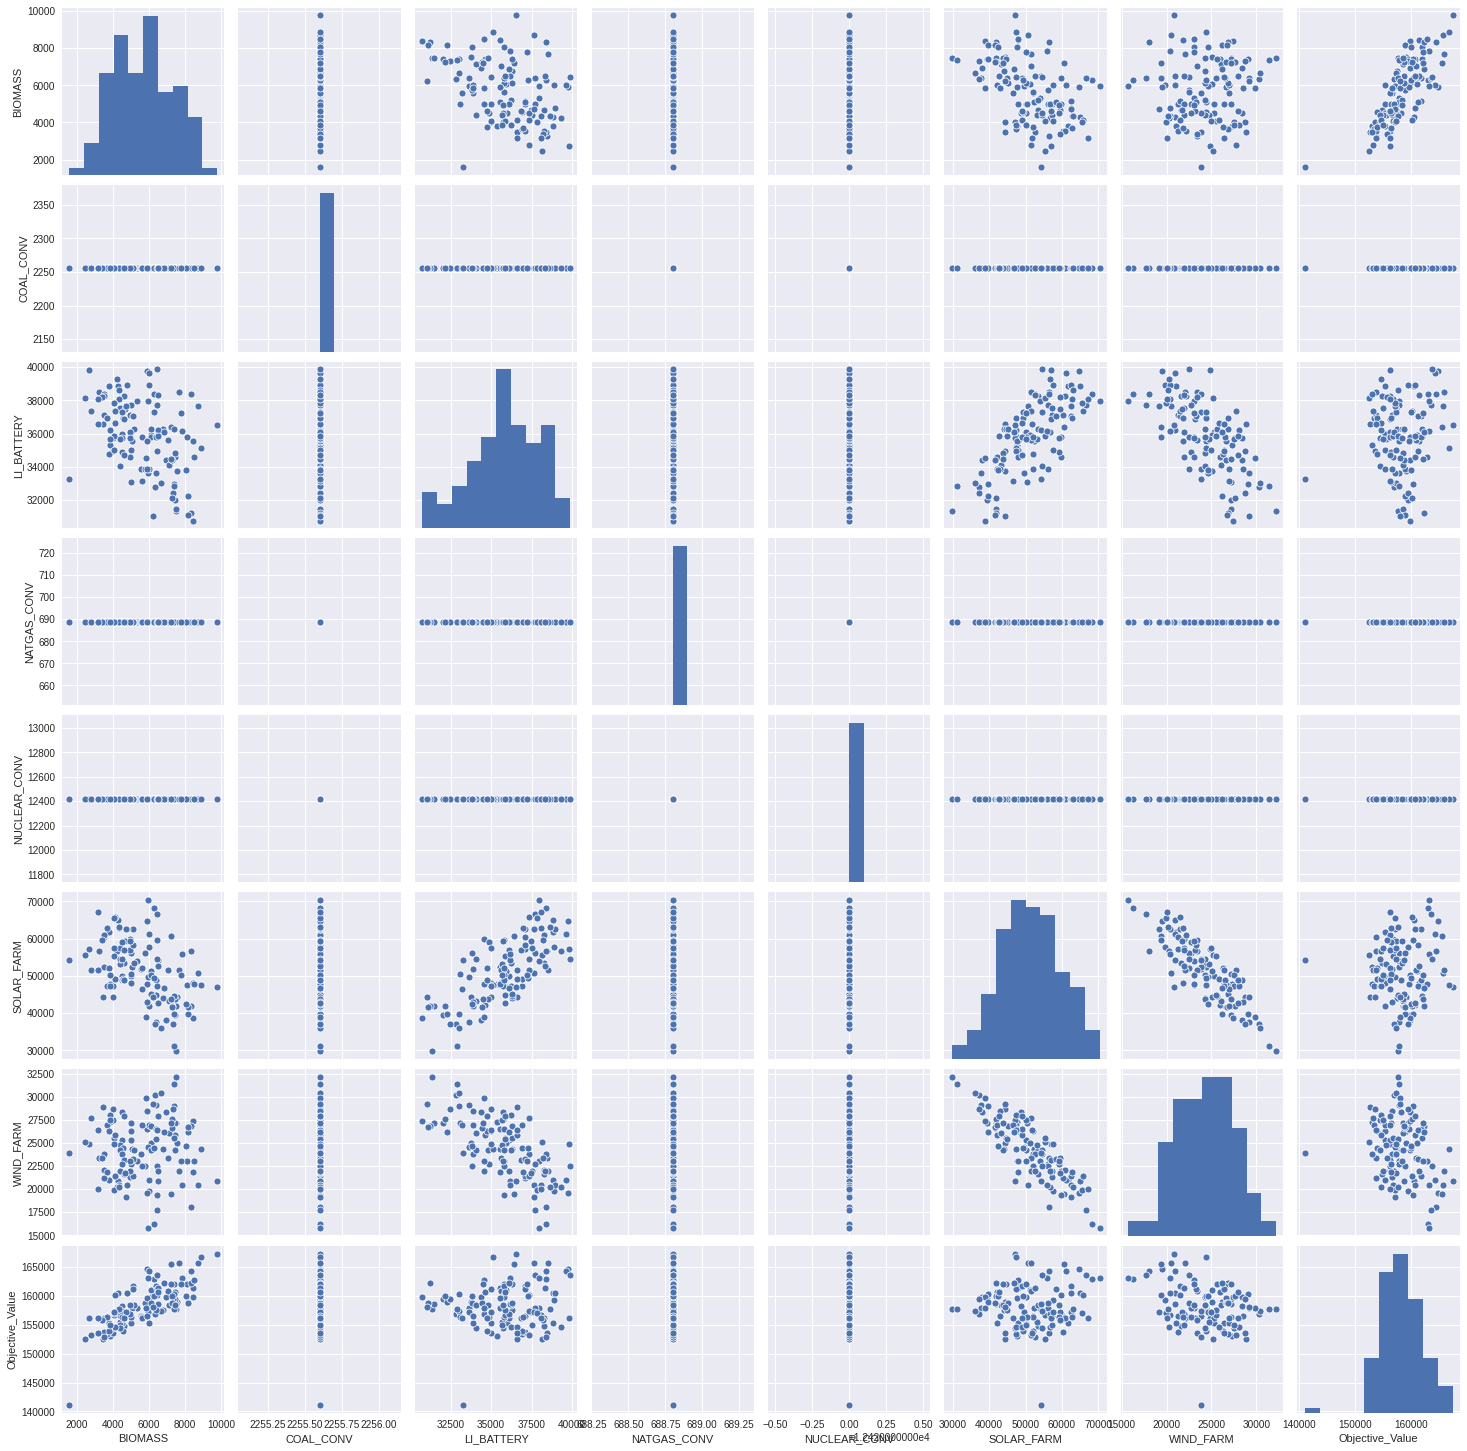

In [13]:
sb.pairplot(df)

In [14]:
conn = sqlite3.connect(data_files[0])
fulldf = get_annual_capacity(conn, region, comm)
for i,file in enumerate(data_files):
    if i == 0:
        continue
    conn = sqlite3.connect(file)
    inter_df = get_annual_capacity(conn, region, comm)
    frames = [fulldf, inter_df]
    fulldf = pd.concat(frames)

In [15]:
fulldf.fillna(0, inplace=True)
fulldf

,BIOMASS,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM
year,,,,,,,
2025,0.0000,7505.90,1423.4405,16371.60,12420.0,267.200,9606.6619
2030,2714.6166,5045.24,27024.1790,16332.70,12420.0,38767.026,17138.1500
2035,2714.6166,2815.74,30237.2080,15903.98,12420.0,43376.248,18999.3340
2040,2714.6166,2444.40,33437.9430,5023.32,12420.0,47958.540,20910.2160
2045,2714.6166,2357.04,36625.5940,688.80,12420.0,52512.175,22873.9830
...,...,...,...,...,...,...,...
2030,1601.7754,5045.24,22832.1960,16332.70,12420.0,37965.299,16659.2210
2035,1601.7754,2815.74,25443.8940,15903.98,12420.0,42049.011,18444.6810
2040,1601.7754,2444.40,28055.5130,5023.32,12420.0,46132.513,20230.4370


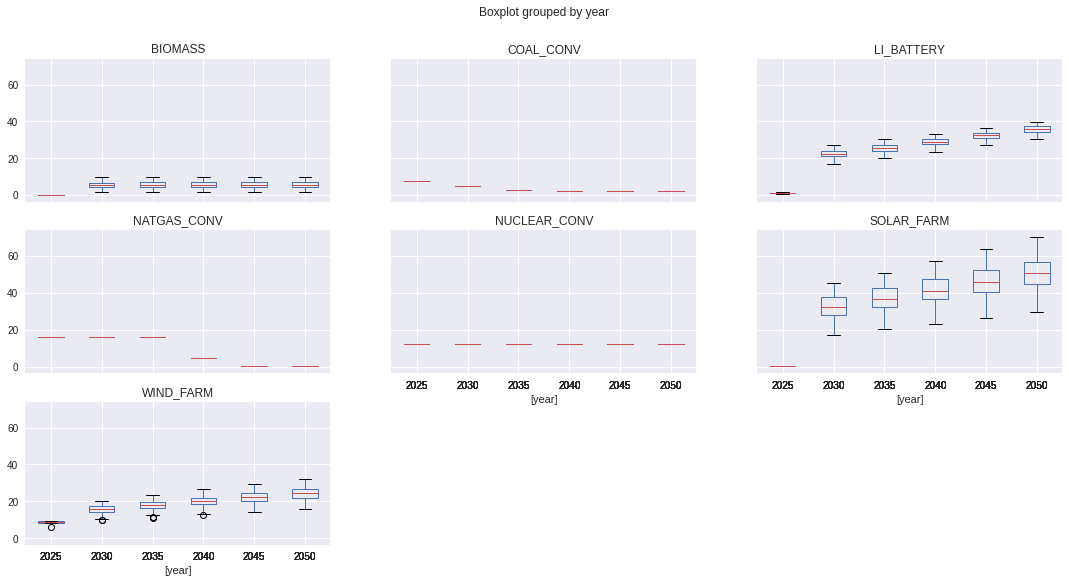

In [16]:
(fulldf/1000).boxplot(by='year', figsize=(18,9))
plt.xlabel('Installed Capacity [GW]')
plt.show()

In [17]:
conn = sqlite3.connect('simulations/illinois/zero_adv_nuclear/IL_ZAN_CC30_52.sqlite')

In [18]:
get_objective(conn)

141064.84056119845

In [19]:
(df[techs]/1000).to_csv('data/results/installed_capacity_2050_ZAN_V2.csv')
(fulldf[techs]/1000).to_csv('data/results/installed_capacity_full_ZAN_V2.csv')